In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
x=np.array([-2,-1,0,1,2])
sigmoide=1/(1+np.exp(-x))
relu=np.maximum(0,x)
tanh=np.tanh(x)
print("sigmoide",sigmoide)
print("relu",relu)
print("tanggente hiperbolica",tanh)

sigmoide [0.11920292 0.26894142 0.5        0.73105858 0.88079708]
relu [0 0 0 1 2]
tanggente hiperbolica [-0.96402758 -0.76159416  0.          0.76159416  0.96402758]


In [2]:
##Función math
import math
x=([-2,-1,0,1,2])
sigmoid=1/ (1+math.exp(-x))
print("sigmoid",sigmoid)

TypeError: bad operand type for unary -: 'list'

Josue Santana Robledo Corona

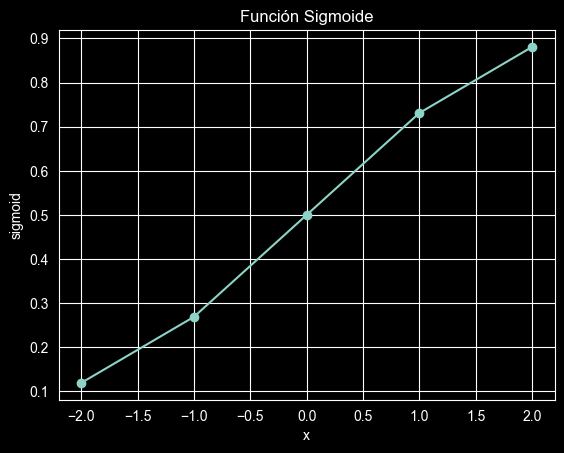

In [20]:
import matplotlib.pyplot as plt
x=np.array([-2,-1,0,1,2])
#x=np.linspace(-6,6,100)
sigmoid=1/ (1+np.exp(-x))
plt.plot(x,sigmoid,marker= "o")
plt.xlabel("x")
plt.ylabel("sigmoid")
plt.title("Función Sigmoide")
plt.grid(True)
plt.show()

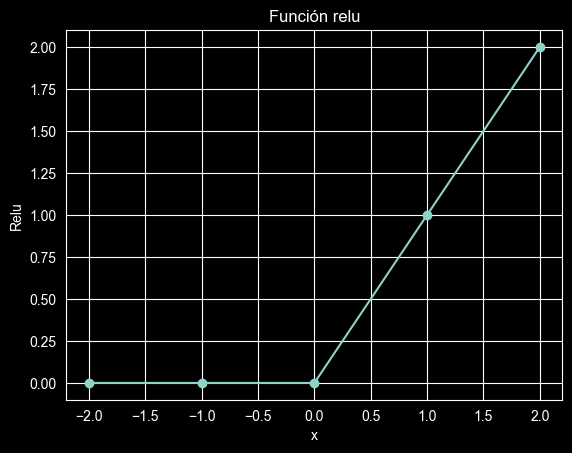

In [19]:
import matplotlib.pyplot as plt
x=np.array([-2,-1,0,1,2])
#x=np.linspace(-6,6,100)
relu=np.maximum(0,x)
plt.plot(x,relu,marker= "o")
plt.xlabel("x")
plt.ylabel("Relu")
plt.title("Función relu")
plt.grid(True)
plt.show()

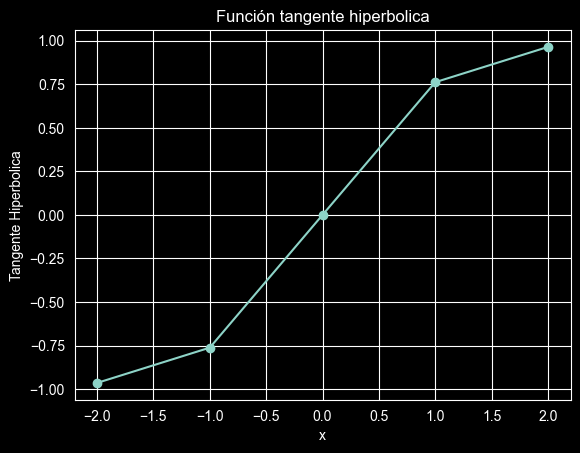

In [18]:
import matplotlib.pyplot as plt
x=np.array([-2,-1,0,1,2])
#x=np.linspace(-6,6,100)
tanh=np.tanh(x)
plt.plot(x,tanh,marker= "o")
plt.xlabel("x")
plt.ylabel("Tangente Hiperbolica")
plt.title("Función tangente hiperbolica")
plt.grid(True)
plt.show()

## Propagación hacia adelante

In [2]:
# Normalización y estandarización
# Valor normalizado = (x-min / max-min)
# Valor estandarizado = x - media_de_valores / desviación_estandar
#x=[0.2,0.5,0.7,1]
#x=[-2, -1,0,1,2]
x=[33,1000] # rango = 5000 - 50000
x1=[80,2] # rango = 20 - 65
val_min= np.array([20,5000])
val_max= np.array([65,50000])
x_norm=(x-val_min)/(val_max-val_min)
print(x_norm)

[ 0.28888889 -0.08888889]


In [13]:
xn= np.array([[20,6000],[35,40000],[29,12000],[50,35000]])
#Normalización minimo máximo
xn_min= xn.min(axis=0)#Toma el valor mínimo de cada columna
xn_max= xn.max(axis=0)#Toma el valor máximo de cada columna
#print(xn_min)
#print(xn_max)

#Normalización
xn_norm=(xn-xn_min)/(xn_max-xn_min)
print("Matriz normalizada\n",xn_norm)
#Se adapta a datos reales

val_min= np.array([20,5000])
val_max= np.array([65,50000])
xn_norm1=(xn-val_min)/(val_max-val_min)
print("\nMatriz normalizada con rangos establecidos\n",xn_norm1)
#Rango de datos establecidos, siempre será igual


Matriz normalizada
 [[0.         0.        ]
 [0.5        1.        ]
 [0.3        0.17647059]
 [1.         0.85294118]]

Matriz normalizada con rangos establecidos
 [[0.         0.02222222]
 [0.33333333 0.77777778]
 [0.2        0.15555556]
 [0.66666667 0.66666667]]


In [8]:
# Ejemplo de una sola neurona
#Entradas: 2 caracteristica [Edad, Ingresos]
#Pesos: 2 (1 por cada entrada)
#Sesgos: 1, esto es por numero de neuronas
# Función de activación sigmoide

x_n=np.array([ 0.28888889, -0.08888889]) # Entradas normalizadas
print("Entradas:",x_n)
w=np.random.rand(2) #Crea 2 números aleatorios
b=np.random.rand(1) #Sesgo aleatorio

#Propagación hacia adelante
v=np.dot(x_n,w)+b #Regresión lineal
s= 1/(1+np.exp(-v))

print("Pesos:",w)
print("Sesgo",b)
print("Valor:",v)
print("Activación: ",s)



Entradas: [ 0.28888889 -0.08888889]
Pesos: [0.36231749 0.47816552]
Sesgo [0.09108847]
Valor: [0.15325437]
Activación:  [0.53823878]


In [12]:
# Ejemplo con 4 neuronas

def sigmoid(x):
    return 1/(1+np.exp(-x))

x_n2=np.array([ 0.28888889, -0.08888889, 0.56234553]) # Nuevas entradas normalizadas
w2=np.random.rand(4,3) #Crea 2 números aleatorios
b2=np.random.rand(4) #Sesgo aleatorio

v2=np.dot(w2,x_n2)+b2 #Regresión lineal
s2= sigmoid(v2)

print("Pesos:\n",w2)
print("Sesgo",b2)
print("Valor:",v2)
print("Activación: ",s2)

Pesos:
 [[0.27373215 0.58881728 0.39966816]
 [0.03482445 0.41800764 0.52320265]
 [0.83247023 0.55771724 0.82651556]
 [0.1674203  0.55225629 0.38062412]]
Sesgo [0.99646349 0.34048837 0.41009037 0.52387085]
Valor: [1.24795395 0.6076132  1.06579424 0.73718954]
Activación:  [0.77694548 0.64739615 0.74379627 0.67638098]


### Función de perdida

In [35]:
# Predice si le van a dar un crédito de un auto o no, valor: 400,000
# Pago mensual de 8000
def sigmoid(x):
    return 1/(1+np.exp(-x))
def loss(y_verdadero,a):
    return -(y_verdadero*np.log(a + 1e-8) + (1-y_verdadero)*np.log(1-a+ 1e-8))
    # 1e-8 valor de seguridad para evitar errores cuando usamos logaritmos

x=np.array([ 0.28888889, -0.08888889]) # Entradas normalizadas
print("Entradas:",x)
w=np.random.rand(2) #Crea 2 números aleatorios
b=np.random.rand(1) #Sesgo aleatorio

#Propagación hacia adelante
z=np.dot(w,x)+b #Regresión lineal
a= sigmoid(z)

# Valor esperado o etiqueta real
y_verdadero=1

# Cálculo de perdida -- Entropía cruzada
loss = loss(y_verdadero,a)


print("Pesos:",w)
print("Sesgo",b)
print("Valor:",z)
print("Activación: ",a)
print("Loss:",loss)


Entradas: [ 0.28888889 -0.08888889]
Pesos: [0.85161713 0.46731996]
Sesgo [0.42081569]
Valor: [0.62529886]
Activación:  [0.65142273]
Loss: [0.42859648]


### Josue Santana Robledo Corona

In [38]:
# valores de sensores normalizados
#Numero de neuronas=numero de segos= 5
def sigmoid(x):
    return 1/(1+np.exp(-x))
def loss(y_verdadero,a):
    return -(y_verdadero*np.log(a + 1e-8) + (1-y_verdadero)*np.log(1-a+ 1e-8))
    # 1e-8 valor de seguridad para evitar errores cuando usamos logaritmos

xn= np.array([[80, 2],[15, 2],[90, 10],[90, 24],[110, 15],[80, 9],[75, 0.5],[92, 15]])

entradas = 2
neuronas = 5

xn_min= xn.min(axis=0)#Toma el valor mínimo de cada columna
xn_max= xn.max(axis=0)#Toma el valor máximo de cada columna

#Normalización
xn_norm=(xn-xn_min)/(xn_max-xn_min)
# print("Matriz normalizada\n",xn_norm)


w=np.random.rand(entradas,neuronas)
b=np.random.rand(neuronas) #Sesgo aleatorio

#Propagación hacia adelante
z=np.dot(xn_norm,w)+b #Regresión lineal
a= sigmoid(z)

print("Pesos: ",w)
print("Sesgo: ",b)
print("Valor: \n",z)
print("Activación: \n",a)


Pesos:  [[0.01749001 0.9337978  0.79499911 0.66142571 0.15756936]
 [0.57940384 0.91256265 0.08157481 0.75500651 0.27574242]]
Sesgo:  [0.22815533 0.90341712 0.96600907 0.2384742  0.37610266]
Valor: 
 [[0.27710541 1.60058009 1.51516273 0.73922053 0.50151385]
 [0.26513856 0.9616658  0.97121597 0.2866661  0.39370324]
 [0.47619032 2.00953422 1.626617   1.06586778 0.61196986]
 [0.82136708 2.55318856 1.67521475 1.51565889 0.77624194]
 [0.60314984 2.40028549 1.81134157 1.36575498 0.70381096]
 [0.44969379 1.87240726 1.53946161 0.96411609 0.58364989]
 [0.23920166 1.49318415 1.46811377 0.65621675 0.47562015]
 [0.59983595 2.22335538 1.66071016 1.24043222 0.67395571]]
Activación: 
 [[0.56883643 0.83209944 0.81982506 0.67682538 0.62281503]
 [0.56589904 0.7234552  0.7253618  0.57117974 0.59717386]
 [0.61684787 0.88179448 0.83570567 0.74381029 0.64839002]
 [0.69452646 0.92778743 0.84226985 0.81989834 0.6848696 ]
 [0.64637661 0.91684907 0.85952394 0.79669344 0.66903217]
 [0.61056643 0.86673657 0.823386

### BackPropagation
#### Josue Santana Robledo Corona

In [6]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
def loss(y_verdadero,a):
    return -(y_verdadero*np.log(a + 1e-8) + (1-y_verdadero)*np.log(1-a+ 1e-8))
    # 1e-8 valor de seguridad para evitar errores cuando usamos logaritmos

x=np.array([ 0.28888889, -0.08888889]) # Entradas normalizadas
w=np.array([0.01749001, 0.9337978])
b=np.array([0.22815533])
z=np.dot(w,x)+b

#Propagación hacia adelante
z=np.dot(w,x)+b #Regresión lineal
a= sigmoid(z)

# Valor esperado o etiqueta real
y_verdadero=1

# Cálculo de perdida -- Entropía cruzada
loss = loss(y_verdadero,a)

#BackPropagation
#Derivadas

dL_da= (y_verdadero/ (a + 1e-8)) + ((1-y_verdadero)/(1-a+1e-8))
da_dz=a*(1-a)
dL_dz=dL_da*da_dz

#Gradientes
dL_dw=dL_dz * x
dL_db=dL_dz * 1

print("\nDerivadas parciales: ")
print("dL_da: ",dL_da)
print("da_dz: ",da_dz)
print("dL_dz: ",dL_dz)

print("\nGradiente: ")
print("dL_dw: ",dL_dw)
print("dL_db: ",dL_db)





Derivadas parciales: 
dL_da:  [1.86053259]
da_dz:  [0.24859521]
dL_dz:  [0.46251949]

Gradiente: 
dL_dw:  [ 0.13361674 -0.04111284]
dL_db:  [0.46251949]


### BackPropagation y optimización

In [9]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def loss(y_verdadero,a):
    return -(y_verdadero*np.log(a + 1e-8) + (1-y_verdadero)*np.log(1-a+ 1e-8))
    # 1e-8 valor de seguridad para evitar errores cuando usamos logaritmos

#Tasa de aprendizaje
alpha=0.1

x=np.array([ 0.28888889, 0.011111111]) # Entradas normalizadas
w=np.array([0.38507866, 0.35278766])
b=np.array([0.98639454])
z=np.dot(w,x)+b

#Propagación hacia adelante
z=np.dot(w,x)+b #Regresión lineal
a= sigmoid(z)

# Valor esperado o etiqueta real
y_verdadero=0

# Cálculo de perdida -- Entropía cruzada
loss = loss(y_verdadero,a)

#BackPropagation
#Derivadas

dL_dz = a - y_verdadero
da_dz = a*(1-a)

#Gradientes
dL_dw=dL_dz * x
dL_db=dL_dz * 1

#Descenso del gradiente -- Actualizar parametros
w= w-alpha*dL_dw
b= b-alpha*dL_db


print("\nDerivadas parciales: ")
print("da_dz: ",da_dz)
print("dL_dz: ",dL_dz)

print("\nGradiente: ")
print("dL_dw: ",dL_dw)
print("dL_db: ",dL_db)

print("\nActualización de parametros: ")
print("w: ",w)
print("b: ",b)



Derivadas parciales: 
da_dz:  [0.18722361]
dL_dz:  [0.75055217]

Gradiente: 
dL_dw:  [0.21682618 0.00833947]
dL_db:  [0.75055217]

Actualización de parametros: 
w:  [0.36339604 0.35195371]
b:  [0.91133932]


## Entrenamiento

Iteración:  0
Valor de capa:  [1.10155935]
Activación:  [0.75055217]
Perdida:  [1.38850543]
Pesos:  [0.36339604 0.35195371]
Sesgo:  [0.91133932]

Iteración:  20
Valor de capa:  [-0.20196352]
Activación:  [0.44968005]
Perdida:  [0.59725542]
Pesos:  [0.02456101 0.3389216 ]
Sesgo:  [-0.26155116]

Iteración:  40
Valor de capa:  [-0.97327766]
Activación:  [0.27422768]
Perdida:  [0.3205189]
Pesos:  [-0.17600727  0.33120743]
Sesgo:  [-0.95582597]

Iteración:  60
Valor de capa:  [-1.46786434]
Activación:  [0.18726744]
Perdida:  [0.20735317]
Pesos:  [-0.30535481  0.32623253]
Sesgo:  [-1.40356746]

Iteración:  80
Valor de capa:  [-1.81988411]
Activación:  [0.13944778]
Perdida:  [0.15018097]
Pesos:  [-0.3978239   0.32267602]
Sesgo:  [-1.72365278]

Iteración:  99
Valor de capa:  [-2.07751186]
Activación:  [0.11130184]
Perdida:  [0.11799762]
Pesos:  [-0.46569588  0.32006556]
Sesgo:  [-1.95859423]



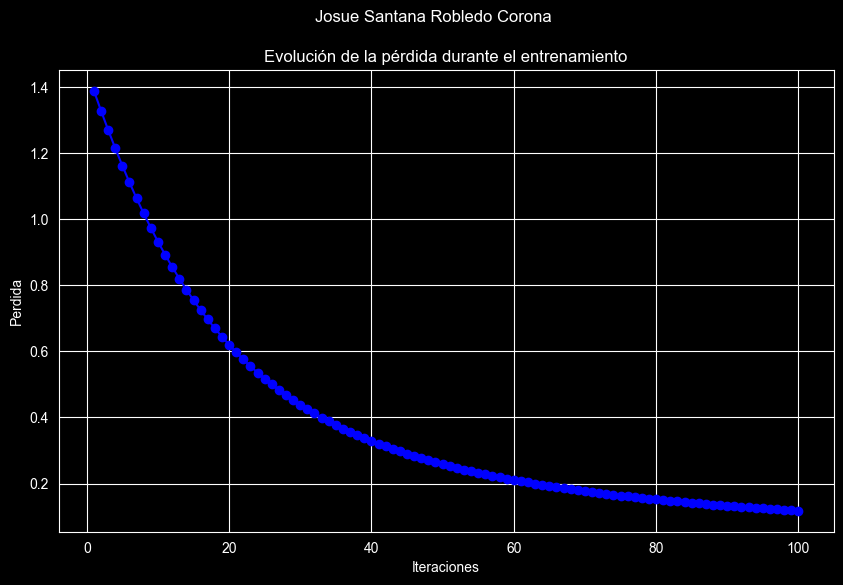

In [6]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def loss(y_verdadero,a):
    return -(y_verdadero*np.log(a + 1e-8) + (1-y_verdadero)*np.log(1-a+ 1e-8))
    # 1e-8 valor de seguridad para evitar errores cuando usamos logaritmos

#Tasa de aprendizaje
alpha=0.1
iter=100

#Variable para guardar los valores de las pérdidas
loss_values=[]

# Valor esperado o etiqueta real
y_verdadero=0
# Inicialización de pesos y sesgos
x=np.array([ 0.28888889, 0.011111111]) # Entradas normalizadas
w=np.array([0.38507866, 0.35278766])
b=np.array([0.98639454])
z=np.dot(w,x)+b

#Entrenamiento
for i in range(iter):
    #Propagación hacia adelante
    z=np.dot(w,x)+b #Regresión lineal
    a= sigmoid(z)

    # Cálculo de perdida -- Entropía cruzada
    loss_val = loss(y_verdadero,a)
    loss_values.append(loss_val)
    #BackPropagation
    #Derivadas
    dL_dz = a - y_verdadero
    da_dz = a*(1-a)

    #Gradientes
    dL_dw=dL_dz * x
    dL_db=dL_dz * 1

    #Descenso del gradiente -- Actualizar parámetros
    w= w-alpha*dL_dw
    b= b-alpha*dL_db



    if i%20==0 or i==iter-1:
        print("Iteración: ",i)
        print("Valor de capa: ",z)
        print("Activación: ",a)
        print("Perdida: ",loss_val)
        print("Pesos: ",w)
        print("Sesgo: ",b)
        print()
#Graficar la pérdida
plt.figure(figsize=(10,6))
plt.plot(range(1,iter+1),loss_values,marker='o',linestyle='-',color='blue')
plt.xlabel("Iteraciones")
plt.ylabel("Perdida")
plt.title("Evolución de la pérdida durante el entrenamiento")
plt.suptitle('Josue Santana Robledo Corona')
plt.grid(True)
plt.show()

